<a href="https://colab.research.google.com/github/MaferLedmar/Extraccion_caracteristicas/blob/main/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install funpymodeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [100]:
#cargar archivo csv
#from google.colab import files
#files.upload()

In [158]:
#Ajustar máximo de columnas
pd.options.display.max_columns = None

In [538]:
micro_retailer = pd.read_excel("microretailer_mit_lift_lab.xlsx")

In [539]:
#Seleccionamos columnas para el análisis
data = micro_retailer.copy()
data = data[['186_internet_connection','232_type_of_store','102_does_the_micro_retailer_sells_fresh_products_','184_store_devices','2_current_permanent_employees','5_change_store_space_last_year','6_change_employees_average_salary_last_year','20_reviews_finances_monthly','49_inventory_records','18_sales_records','145_number_direct_competitors','210_sales_channels','189_payment_methods','214_customer_relationship_tools','38_average_margin_profits','60_services','69_why_not_services','158_charact_organize_products_on_shelves','157_frequency_organize_shelves','161_actions_stockouts']]
data.head()

,186_internet_connection,232_type_of_store,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,2_current_permanent_employees,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,145_number_direct_competitors,210_sales_channels,189_payment_methods,214_customer_relationship_tools,38_average_margin_profits,60_services,69_why_not_services,158_charact_organize_products_on_shelves,157_frequency_organize_shelves,161_actions_stockouts
0,yes,Tailor,no,POS system (i.e. computer + bar code scanner +...,2.0,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,3.0,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Redes sociales,NaN,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...",Semestralmente,Solicitar tiempo al cliente para conseguir el ...
1,yes,Grocery store (aka. nanostore),yes,Dataphone (i.e. card payments),1.0,Aumentó 15%,No cambió,yes,No lo hago,No lo hago,4.0,WhatsApp,"Efectivo,Transferencia interbancaria",Aplicación móvil,NaN,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...",NaN,"Ofrecer un producto sustituto,Solicitar tiempo..."
2,yes,Grocery store (aka. nanostore),no,"Dataphone (i.e. card payments),POS system (i.e...",2.0,No cambió,No cambió,yes,En Excel,Software especializado + computadora,0.0,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Redes sociales,NaN,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...",Semanalmente,Perder la venta
3,yes,Grocery store (aka. nanostore),no,POS system (i.e. computer + bar code scanner +...,1.0,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,4.0,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,NaN,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...",Semanalmente,Ofrecer un producto sustituto
4,yes,Grocery store (aka. nanostore),no,Smartphone,0.0,No cambió,No cambió,yes,En papel,En papel,0.0,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",NaN,NaN,NaN,NaN,Venta cruzada (e.g. cereal + leche),Mensualmente,"Informar al proveedor,Solicitar tiempo al clie..."


In [540]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   186_internet_connection                            108 non-null    object 
 1   232_type_of_store                                  171 non-null    object 
 2   102_does_the_micro_retailer_sells_fresh_products_  171 non-null    object 
 3   184_store_devices                                  169 non-null    object 
 4   2_current_permanent_employees                      111 non-null    float64
 5   5_change_store_space_last_year                     99 non-null     object 
 6   6_change_employees_average_salary_last_year        85 non-null     object 
 7   20_reviews_finances_monthly                        108 non-null    object 
 8   49_inventory_records                               110 non-null    object 
 9   18_sales_r

Valores nulos

In [541]:
nulos = data.isnull().sum()
nulos

186_internet_connection                               63
232_type_of_store                                      0
102_does_the_micro_retailer_sells_fresh_products_      0
184_store_devices                                      2
2_current_permanent_employees                         60
5_change_store_space_last_year                        72
6_change_employees_average_salary_last_year           86
20_reviews_finances_monthly                           63
49_inventory_records                                  61
18_sales_records                                      61
145_number_direct_competitors                         68
210_sales_channels                                    89
189_payment_methods                                   64
214_customer_relationship_tools                       76
38_average_margin_profits                            105
60_services                                           94
69_why_not_services                                  130
158_charact_organize_products_o

In [542]:
#reemplazo para valores númericos
data['2_current_permanent_employees'] = data['2_current_permanent_employees'].fillna(round(data['2_current_permanent_employees'].median(),1))
data['145_number_direct_competitors'] = data['145_number_direct_competitors'].fillna(method='ffill')

#sustitución para las demás variables
data = data.fillna("desconocido")

print("Total de valores nulos: ",data.isnull().sum().sum())

Total de valores nulos:  0


<ipython-input-542-699d23e5e4aa>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['145_number_direct_competitors'] = data['145_number_direct_competitors'].fillna(method='ffill')


Valores atípicos

<Figure size 500x500 with 0 Axes>

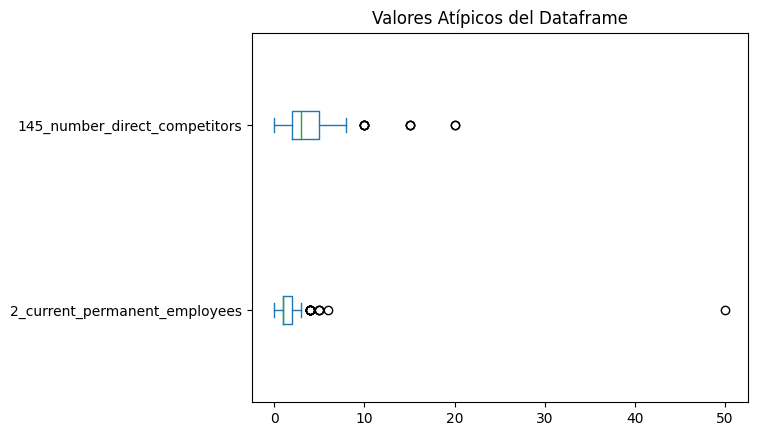

In [543]:
fig = plt.figure(figsize =(5, 5))
data.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [544]:
data1= data.copy()
cuanti = data1[['2_current_permanent_employees','145_number_direct_competitors']]
cuali = data1[['102_does_the_micro_retailer_sells_fresh_products_','186_internet_connection','232_type_of_store','184_store_devices','5_change_store_space_last_year','6_change_employees_average_salary_last_year','20_reviews_finances_monthly','49_inventory_records','18_sales_records','210_sales_channels','189_payment_methods','214_customer_relationship_tools','38_average_margin_profits','60_services','69_why_not_services','158_charact_organize_products_on_shelves','157_frequency_organize_shelves','161_actions_stockouts']]

In [545]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   186_internet_connection                            171 non-null    object 
 1   232_type_of_store                                  171 non-null    object 
 2   102_does_the_micro_retailer_sells_fresh_products_  171 non-null    object 
 3   184_store_devices                                  171 non-null    object 
 4   2_current_permanent_employees                      171 non-null    float64
 5   5_change_store_space_last_year                     171 non-null    object 
 6   6_change_employees_average_salary_last_year        171 non-null    object 
 7   20_reviews_finances_monthly                        171 non-null    object 
 8   49_inventory_records                               171 non-null    object 
 9   18_sales_r

In [546]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuanti

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 2_current_permanent_employees    3.5
145_number_direct_competitors    9.5
dtype: float64
Limite inferior permitido 2_current_permanent_employees   -0.5
145_number_direct_competitors   -2.5
dtype: float64


In [547]:
#Obtenemos datos limpios del Dataframe
cuanti2 = cuanti[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
#vemos valores nulos
cuanti2.isnull().sum()

2_current_permanent_employees    15
145_number_direct_competitors    10
dtype: int64

In [548]:
cuanti3=cuanti2.copy()
cuanti3=cuanti3.fillna(round(cuanti3.mean(),1))

print("Comprobamos valores nulos: \n",cuanti3.isnull().sum())

Comprobamos valores nulos: 
 2_current_permanent_employees    0
145_number_direct_competitors    0
dtype: int64


In [549]:
#Juntamos las bases en una sola final
Datos_limpios = pd.concat([cuanti3, cuali], axis=1)
#Datos_limpios

## Análisis univariado

1. Columna: 186_internet_connection

In [550]:
#obtengo un análisis univariado de una variable categórica en específico
table1 = freq_tbl(Datos_limpios['186_internet_connection'])
table1

,186_internet_connection,frequency,percentage,cumulative_perc
0,yes,76,0.444444,0.444444
1,desconocido,63,0.368421,0.812865
2,no,32,0.187135,1.000000


In [551]:
#Ajusto el índice como las categorías
table1_index = table1.set_index('186_internet_connection')
table1_index

,frequency,percentage,cumulative_perc
186_internet_connection,,,
yes,76,0.444444,0.444444
desconocido,63,0.368421,0.812865
no,32,0.187135,1.000000


Text(0.5, 1.0, '186_internet_connection')

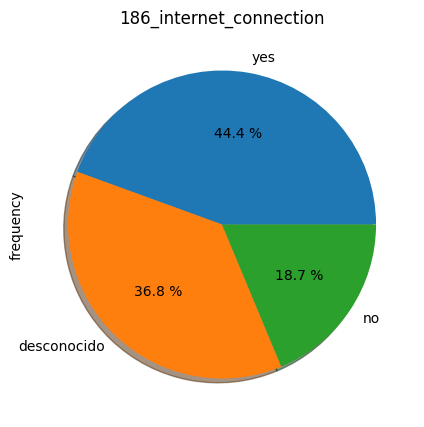

In [552]:
#Realizamos grafico de pastel del dataframe creado
table1_index["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title("186_internet_connection")

2. 232_type_of_store

In [553]:
#Análisis univariado de una sola columna
table2=freq_tbl(Datos_limpios['232_type_of_store'])
table2

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [554]:
#Filtrar frecuencia de al menos 3 para representar al tipo de tiendas más popular
filtro2=table2[table2['frequency']>3]
filtro2

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
5,Produce (fruits & vegetables),4,0.023392,0.637427


In [555]:
#Poner las categorías como índices
filtro2_index=filtro2.set_index('232_type_of_store')
filtro2_index

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427


Text(0, 0.5, 'Frecuencia')

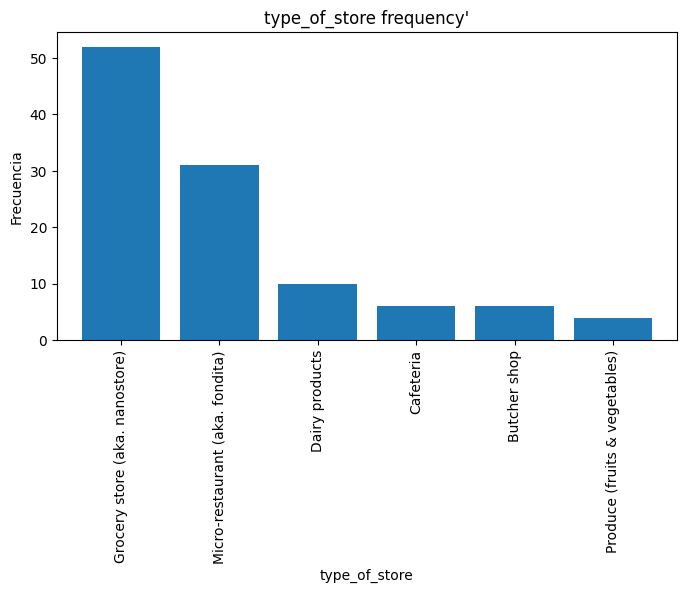

In [556]:
#Realizamos gráfico de barras del df filtrado
filtro2_index['frequency'].plot(kind= 'bar', width=0.8, figsize=(8,4))
plt.title("type_of_store frequency'")
plt.xlabel("type_of_store")
plt.ylabel("Frecuencia")

3. 102_does_the_micro_retailer_sells_fresh_products_

In [557]:
#Análisis univariado de una sola columna
table3=freq_tbl(Datos_limpios['102_does_the_micro_retailer_sells_fresh_products_'])
table3

,102_does_the_micro_retailer_sells_fresh_products_,frequency,percentage,cumulative_perc
0,no,105,0.614035,0.614035
1,yes,66,0.385965,1.000000


In [558]:
#Poner las categorías como índices
table3_index=table3.set_index('102_does_the_micro_retailer_sells_fresh_products_')
table3_index

,frequency,percentage,cumulative_perc
102_does_the_micro_retailer_sells_fresh_products_,,,
no,105,0.614035,0.614035
yes,66,0.385965,1.000000


Text(0.5, 1.0, 'does_the_micro_retailer_sells_fresh_products')

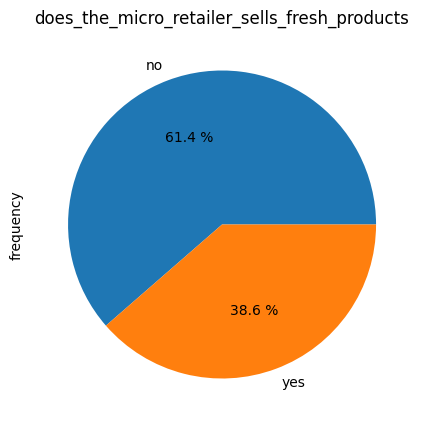

In [559]:
#Gráfico de pastel
table3_index["frequency"].plot(kind='pie',figsize=(10,5),autopct="%0.1f %%")
plt.title('does_the_micro_retailer_sells_fresh_products')

4. 184_store_devices

In [560]:
#Análisis univariado de una sola columna
table4=freq_tbl(Datos_limpios['184_store_devices'])
table4 #39 categorías

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.672515
9,"Analog cash register,Security cameras",4,0.023392,0.695906


In [561]:
#obtengo un filtro de los valores más relevantes de la variable categoricas seleccionadas
filtro4 = table4[table4['frequency']>5]
filtro4

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643


In [562]:
#Agrupar categorías solo para una mejor visualización
cant_smartphone=52+9+8+7
cant_cash_register=16+8
cant_pos=9+9
cant_cameras=7

metodos=['Smartphone','Analog cash register','POS system','Security cameras']
frecuencias=[cant_smartphone,cant_cash_register,cant_pos,cant_cameras]

df={'184_store_devices':metodos,
    'frequency':frecuencias}
df=pd.DataFrame(df)
df

,184_store_devices,frequency
0,Smartphone,76
1,Analog cash register,24
2,POS system,18
3,Security cameras,7


In [563]:
filtro4_index = df.set_index('184_store_devices')
filtro4_index

,frequency
184_store_devices,
Smartphone,76
Analog cash register,24
POS system,18
Security cameras,7


Text(0.5, 1.0, 'Store Devices')

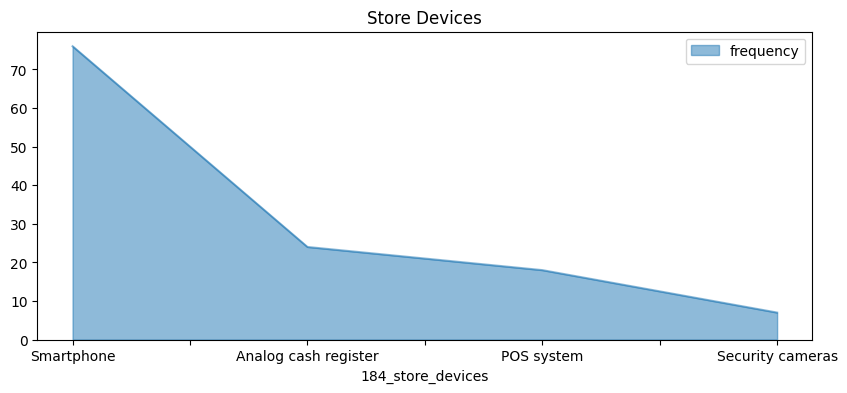

In [564]:
filtro4_index.plot(kind='area', figsize=(10,4), alpha = 0.5)
plt.title("Store Devices")

5. 2_current_permanent_employees

In [565]:
#Análisis univariado de una sola columna
Datos_limpios['2_current_permanent_employees'] = Datos_limpios['2_current_permanent_employees'].astype(object)
table5=freq_tbl(Datos_limpios['2_current_permanent_employees'])
table5

,2_current_permanent_employees,frequency,percentage,cumulative_perc
0,1.0,93,0.543860,0.543860
1,2.0,26,0.152047,0.695906
2,0.0,26,0.152047,0.847953
3,1.1,15,0.087719,0.935673
4,3.0,11,0.064327,1.000000


In [566]:
table5_index = table5.set_index('2_current_permanent_employees')
table5_index

,frequency,percentage,cumulative_perc
2_current_permanent_employees,,,
1.0,93,0.543860,0.543860
2.0,26,0.152047,0.695906
0.0,26,0.152047,0.847953
1.1,15,0.087719,0.935673
3.0,11,0.064327,1.000000


6. 5_change_store_space_last_year

In [567]:
table6=freq_tbl(Datos_limpios['5_change_store_space_last_year'])
table6

,5_change_store_space_last_year,frequency,percentage,cumulative_perc
0,No cambió,72,0.421053,0.421053
1,desconocido,72,0.421053,0.842105
2,Disminuyó 15%,9,0.052632,0.894737
3,Aumentó 25%,7,0.040936,0.935673
4,Aumentó 15%,4,0.023392,0.959064
5,Aumentó 50% o más,4,0.023392,0.982456
6,Disminuyó 25%,2,0.011696,0.994152
7,Disminuyó 50% o más,1,0.005848,1.000000


In [568]:
#obtengo un filtro de los valores más relevantes de la variable categoricas seleccionadas
filtro6 = table6[table6['frequency']>5]
filtro6

,5_change_store_space_last_year,frequency,percentage,cumulative_perc
0,No cambió,72,0.421053,0.421053
1,desconocido,72,0.421053,0.842105
2,Disminuyó 15%,9,0.052632,0.894737
3,Aumentó 25%,7,0.040936,0.935673


In [569]:
filtro6_index = filtro6.set_index('5_change_store_space_last_year')
filtro6_index

,frequency,percentage,cumulative_perc
5_change_store_space_last_year,,,
No cambió,72,0.421053,0.421053
desconocido,72,0.421053,0.842105
Disminuyó 15%,9,0.052632,0.894737
Aumentó 25%,7,0.040936,0.935673


Text(0, 0.5, 'Frecuencia')

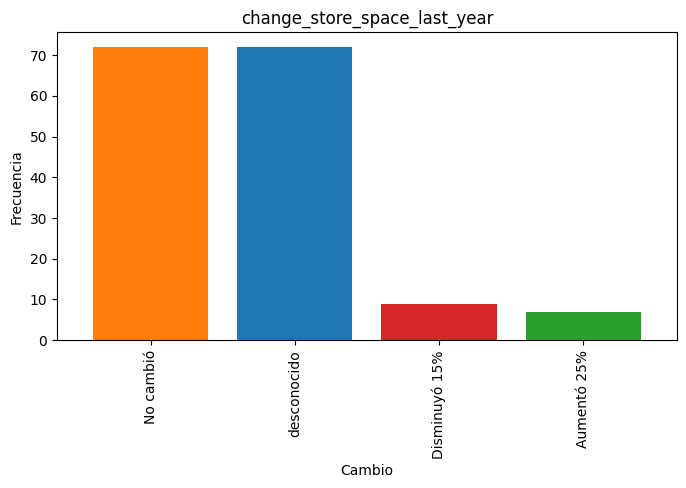

In [570]:
#Grafico de barras
bar_colors = ['tab:orange', 'tab:blue', 'tab:red', 'tab:green']
filtro6_index['frequency'].plot(kind= 'bar', width=0.8, figsize=(8,4),color=bar_colors)
plt.title("change_store_space_last_year")
plt.xlabel("Cambio")
plt.ylabel("Frecuencia")

7. 6_change_employees_average_salary_last_year

In [571]:
table7=freq_tbl(Datos_limpios['6_change_employees_average_salary_last_year'])
table7

,6_change_employees_average_salary_last_year,frequency,percentage,cumulative_perc
0,desconocido,86,0.502924,0.502924
1,No cambió,50,0.292398,0.795322
2,Aumentó 15%,14,0.081871,0.877193
3,Disminuyó 15%,5,0.029240,0.906433
4,Aumentó 25%,4,0.023392,0.929825
5,Aumentó 50% o más,4,0.023392,0.953216
6,Disminuyó 25%,3,0.017544,0.970760
7,Dependiente,1,0.005848,0.976608
8,Disminuyó 50% o más,1,0.005848,0.982456
9,0,1,0.005848,0.988304


In [572]:
#obtengo un filtro de los valores más relevantes de la variable categoricas seleccionadas
filtro7 = table7[table7['frequency']>3]
filtro7

,6_change_employees_average_salary_last_year,frequency,percentage,cumulative_perc
0,desconocido,86,0.502924,0.502924
1,No cambió,50,0.292398,0.795322
2,Aumentó 15%,14,0.081871,0.877193
3,Disminuyó 15%,5,0.029240,0.906433
4,Aumentó 25%,4,0.023392,0.929825
5,Aumentó 50% o más,4,0.023392,0.953216


In [573]:
filtro7_index = filtro7.set_index('6_change_employees_average_salary_last_year')
filtro7_index= filtro7_index.drop('desconocido', axis=0) #lo quitamos solo para visualizar
filtro7_index

,frequency,percentage,cumulative_perc
6_change_employees_average_salary_last_year,,,
No cambió,50,0.292398,0.795322
Aumentó 15%,14,0.081871,0.877193
Disminuyó 15%,5,0.029240,0.906433
Aumentó 25%,4,0.023392,0.929825
Aumentó 50% o más,4,0.023392,0.953216


Text(0, 0.5, 'Frecuencia')

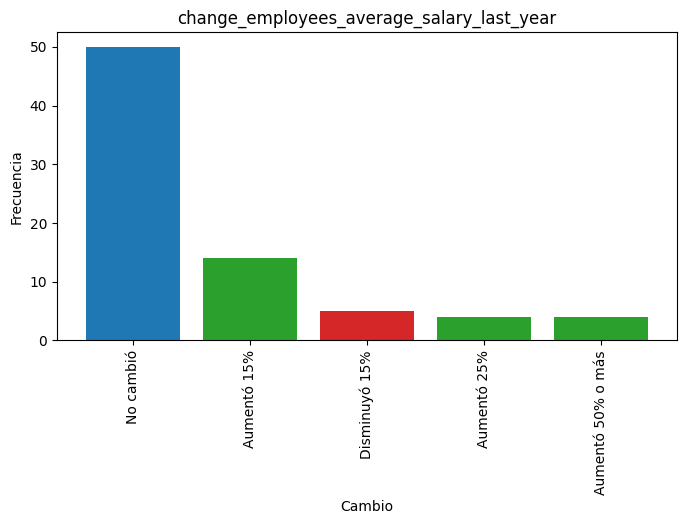

In [574]:
#Grafico de barras
bar_colors = ['tab:blue', 'tab:green', 'tab:red','tab:green','tab:green']
filtro7_index['frequency'].plot(kind= 'bar', width=0.8, figsize=(8,4),color=bar_colors)
plt.title("change_employees_average_salary_last_year")
plt.xlabel("Cambio")
plt.ylabel("Frecuencia")

8. 20_reviews_finances_monthly

In [575]:
table8=freq_tbl(Datos_limpios['20_reviews_finances_monthly'])
table8

,20_reviews_finances_monthly,frequency,percentage,cumulative_perc
0,yes,79,0.461988,0.461988
1,desconocido,63,0.368421,0.830409
2,no,29,0.169591,1.000000


In [576]:
#Poner las categorías como índices
table8_index=table8.set_index('20_reviews_finances_monthly')
table8_index

,frequency,percentage,cumulative_perc
20_reviews_finances_monthly,,,
yes,79,0.461988,0.461988
desconocido,63,0.368421,0.830409
no,29,0.169591,1.000000


Text(0.5, 1.0, 'reviews_finances_monthly')

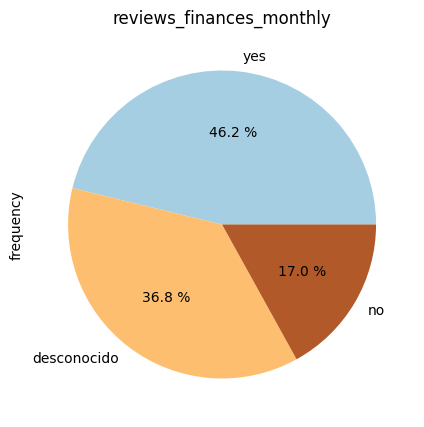

In [577]:
#Gráfico de pastel
table8_index["frequency"].plot(kind='pie',figsize=(10,5),autopct="%0.1f %%", cmap="Paired")
plt.title('reviews_finances_monthly')

9. 49_inventory_records

In [578]:
table9=freq_tbl(Datos_limpios['49_inventory_records'])
table9

,49_inventory_records,frequency,percentage,cumulative_perc
0,desconocido,61,0.356725,0.356725
1,En papel,40,0.233918,0.590643
2,Software especializado + computadora,21,0.122807,0.713450
3,En Excel,20,0.116959,0.830409
4,No lo hago,18,0.105263,0.935673
5,"En Excel,En papel",7,0.040936,0.976608
6,Mentalmente,1,0.005848,0.982456
7,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.988304
8,"En papel,Mental",1,0.005848,0.994152
9,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


In [579]:
#obtengo un filtro de los valores más relevantes de la variable categoricas seleccionadas
filtro9 = table9[table9['frequency']>=10]
filtro9

,49_inventory_records,frequency,percentage,cumulative_perc
0,desconocido,61,0.356725,0.356725
1,En papel,40,0.233918,0.590643
2,Software especializado + computadora,21,0.122807,0.713450
3,En Excel,20,0.116959,0.830409
4,No lo hago,18,0.105263,0.935673


In [580]:
filtro9_index = filtro9.set_index('49_inventory_records')
filtro9_index

,frequency,percentage,cumulative_perc
49_inventory_records,,,
desconocido,61,0.356725,0.356725
En papel,40,0.233918,0.590643
Software especializado + computadora,21,0.122807,0.713450
En Excel,20,0.116959,0.830409
No lo hago,18,0.105263,0.935673


Text(0, 0.5, 'Frecuencia')

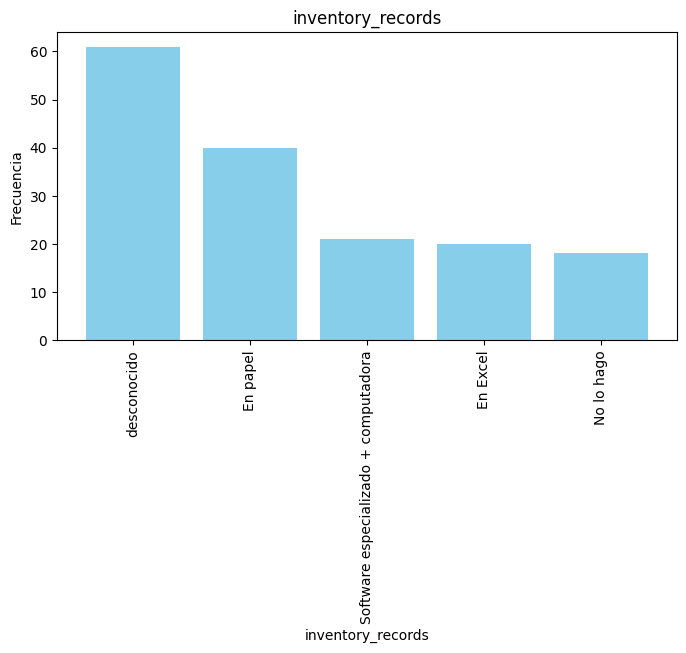

In [581]:
#Grafico de barras
#bar_colors = ['tab:blue', 'tab:green', 'tab:red','tab:green','tab:green']
filtro9_index['frequency'].plot(kind= 'bar', width=0.8, figsize=(8,4), color="skyblue")
plt.title("inventory_records")
plt.xlabel("inventory_records")
plt.ylabel("Frecuencia")

10. 18_sales_records

In [582]:
table10=freq_tbl(Datos_limpios['18_sales_records'])
table10 #16

,18_sales_records,frequency,percentage,cumulative_perc
0,desconocido,61,0.356725,0.356725
1,En papel,47,0.274854,0.631579
2,Software especializado + computadora,22,0.128655,0.760234
3,No lo hago,14,0.081871,0.842105
4,En Excel,10,0.058480,0.900585
5,Caja registradora (análoga),4,0.023392,0.923977
6,"En Excel,En papel",4,0.023392,0.947368
7,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.953216
8,"Aplicación móvil (i.e. App) + smartphone,Caja ...",1,0.005848,0.959064
9,Contadora,1,0.005848,0.964912


In [583]:
#obtengo un filtro de los valores más relevantes de la variable categoricas seleccionadas
filtro10 = table10[table10['frequency']>=10]
filtro10

,18_sales_records,frequency,percentage,cumulative_perc
0,desconocido,61,0.356725,0.356725
1,En papel,47,0.274854,0.631579
2,Software especializado + computadora,22,0.128655,0.760234
3,No lo hago,14,0.081871,0.842105
4,En Excel,10,0.058480,0.900585


In [584]:
filtro10_index = filtro10.set_index('18_sales_records')
filtro10_index

,frequency,percentage,cumulative_perc
18_sales_records,,,
desconocido,61,0.356725,0.356725
En papel,47,0.274854,0.631579
Software especializado + computadora,22,0.128655,0.760234
No lo hago,14,0.081871,0.842105
En Excel,10,0.058480,0.900585


Text(0, 0.5, 'Frecuencia')

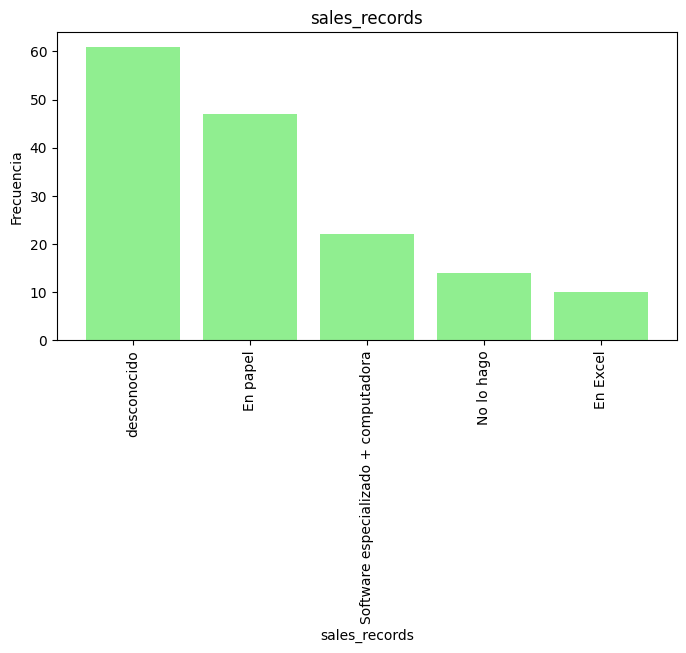

In [585]:
#Grafico de barras
filtro10_index['frequency'].plot(kind= 'bar', width=0.8, figsize=(8,4), color="lightgreen")
plt.title("sales_records")
plt.xlabel("sales_records")
plt.ylabel("Frecuencia")

11. 145_number_direct_competitors

In [586]:
#Análisis univariado de una sola columna
Datos_limpios['145_number_direct_competitors'] = Datos_limpios['145_number_direct_competitors'].astype(object)
table11=freq_tbl(Datos_limpios['145_number_direct_competitors'])
table11

,145_number_direct_competitors,frequency,percentage,cumulative_perc
0,3.0,40,0.233918,0.233918
1,2.0,23,0.134503,0.368421
2,1.0,22,0.128655,0.497076
3,0.0,20,0.116959,0.614035
4,4.0,19,0.111111,0.725146
5,5.0,14,0.081871,0.807018
6,3.1,10,0.058480,0.865497
7,7.0,9,0.052632,0.918129
8,8.0,8,0.046784,0.964912
9,6.0,6,0.035088,1.000000


In [587]:
table11_index = table11.set_index('145_number_direct_competitors')
table11_index

,frequency,percentage,cumulative_perc
145_number_direct_competitors,,,
3.0,40,0.233918,0.233918
2.0,23,0.134503,0.368421
1.0,22,0.128655,0.497076
0.0,20,0.116959,0.614035
4.0,19,0.111111,0.725146
5.0,14,0.081871,0.807018
3.1,10,0.058480,0.865497
7.0,9,0.052632,0.918129
8.0,8,0.046784,0.964912


In [588]:
#obtengo un filtro de los valores más relevantes de la variable categoricas seleccionadas
filtro11 = table11_index[table11_index['frequency']>10]
filtro11 = filtro11.sort_index()
filtro11

,frequency,percentage,cumulative_perc
145_number_direct_competitors,,,
0.0,20,0.116959,0.614035
1.0,22,0.128655,0.497076
2.0,23,0.134503,0.368421
3.0,40,0.233918,0.233918
4.0,19,0.111111,0.725146
5.0,14,0.081871,0.807018


Text(0, 0.5, 'Frecuencia')

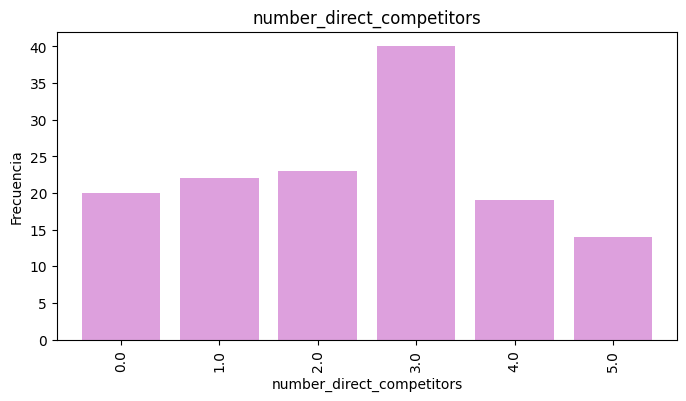

In [589]:
#Grafico de barras
filtro11['frequency'].plot(kind= 'bar', width=0.8, figsize=(8,4), color="plum")
plt.title("number_direct_competitors")
plt.xlabel("number_direct_competitors")
plt.ylabel("Frecuencia")

12. 210_sales_channels

In [590]:
#Análisis univariado de una sola columna
table12=freq_tbl(Datos_limpios['210_sales_channels'])
table12 #29

,210_sales_channels,frequency,percentage,cumulative_perc
0,desconocido,89,0.520468,0.520468
1,"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.584795
2,WhatsApp,10,0.058480,0.643275
3,"Redes sociales (e.g. Facebook, Instagram),What...",9,0.052632,0.695906
4,Llamada a Teléfono fijo,6,0.035088,0.730994
5,"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
6,Llamada a Teléfono celular,5,0.029240,0.795322
7,"Llamada a Teléfono celular,Redes sociales (e.g...",5,0.029240,0.824561
8,"Llamada a Teléfono celular,Llamada a Teléfono ...",3,0.017544,0.842105
9,Ninguno,3,0.017544,0.859649


In [591]:
#obtengo un filtro de los valores más relevantes de la variable categoricas seleccionadas
filtro12 = table12[table12['frequency']>5]
#filtro11 = filtro11.sort_index()
filtro12

,210_sales_channels,frequency,percentage,cumulative_perc
0,desconocido,89,0.520468,0.520468
1,"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.584795
2,WhatsApp,10,0.058480,0.643275
3,"Redes sociales (e.g. Facebook, Instagram),What...",9,0.052632,0.695906
4,Llamada a Teléfono fijo,6,0.035088,0.730994
5,"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082


In [592]:
table12_index = filtro12.set_index('210_sales_channels')
table12_index

,frequency,percentage,cumulative_perc
210_sales_channels,,,
desconocido,89,0.520468,0.520468
"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.584795
WhatsApp,10,0.058480,0.643275
"Redes sociales (e.g. Facebook, Instagram),WhatsApp",9,0.052632,0.695906
Llamada a Teléfono fijo,6,0.035088,0.730994
"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082


13. 189_payment_methods

In [593]:
#Análisis univariado de una sola columna
table13=freq_tbl(Datos_limpios['189_payment_methods'])
table13

,189_payment_methods,frequency,percentage,cumulative_perc
0,desconocido,64,0.374269,0.374269
1,Efectivo,40,0.233918,0.608187
2,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.783626
3,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
4,"Efectivo,Transferencia interbancaria",15,0.087719,0.982456
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.988304
6,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
7,Tarjeta de débito y/o crédito,1,0.005848,1.000000


In [594]:
#obtengo un filtro de los valores más relevantes de la variable categoricas seleccionadas
filtro13 = table13[table13['frequency']>5]
filtro13 = filtro13.set_index('189_payment_methods')
filtro13

,frequency,percentage,cumulative_perc
189_payment_methods,,,
desconocido,64,0.374269,0.374269
Efectivo,40,0.233918,0.608187
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",30,0.175439,0.783626
"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
"Efectivo,Transferencia interbancaria",15,0.087719,0.982456


In [595]:
#Agrupar categorías solo para una mejor visualización
cant_desconocido=64
cant_efectivo=40+30+19+15
cant_tarjeta=30+19
cant_transferencia=30+15

metodos=['Descnonocido','Efectivo','Tarjeta de débito y/o crédito','Transferencia interbancaria']
frecuencias=[cant_desconocido,cant_efectivo,cant_tarjeta,cant_transferencia]

df1={'189_payment_methods':metodos,
    'frequency':frecuencias}
df1=pd.DataFrame(df1)
df1

,189_payment_methods,frequency
0,Descnonocido,64
1,Efectivo,104
2,Tarjeta de débito y/o crédito,49
3,Transferencia interbancaria,45


Text(0.5, 1.0, 'Store Devices')

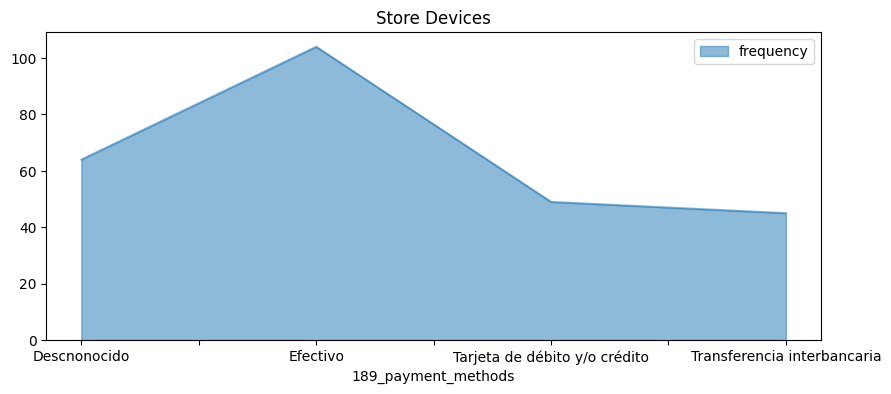

In [596]:
df1 = df1.set_index('189_payment_methods')
df1.plot(kind='area', figsize=(10,4), alpha = 0.5)
plt.title("Store Devices")

14. 214_customer_relationship_tools

In [597]:
#Análisis univariado de una sola columna
table14=freq_tbl(Datos_limpios['214_customer_relationship_tools'])
table14

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,desconocido,76,0.444444,0.444444
1,Redes sociales,27,0.157895,0.602339
2,Aplicación móvil,21,0.122807,0.725146
3,Ninguna,20,0.116959,0.842105
4,"Aplicación móvil,Redes sociales",13,0.076023,0.918129
5,Cuaderno,6,0.035088,0.953216
6,Teléfono,1,0.005848,0.959064
7,"Cuaderno,Redes sociales",1,0.005848,0.964912
8,"Aplicación móvil,De frente",1,0.005848,0.970760
9,Físico,1,0.005848,0.976608


In [598]:
#obtengo un filtro de los valores más relevantes de la variable categoricas seleccionadas
filtro14 = table14[table14['frequency']>10]
filtro14 = filtro14.set_index('214_customer_relationship_tools')
filtro14

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
desconocido,76,0.444444,0.444444
Redes sociales,27,0.157895,0.602339
Aplicación móvil,21,0.122807,0.725146
Ninguna,20,0.116959,0.842105
"Aplicación móvil,Redes sociales",13,0.076023,0.918129


Text(0.5, 1.0, 'Customer relationship tools')

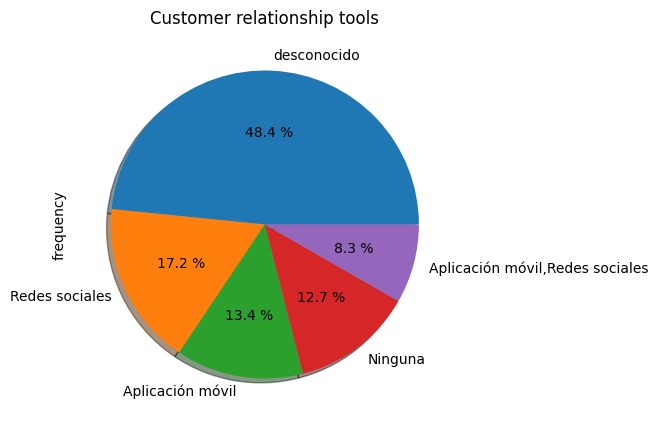

In [599]:
#Realizamos grafico de pastel del dataframe creado
filtro14["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title("Customer relationship tools")

15. 38_average_margin_profits

In [600]:
#Análisis univariado de una sola columna
table15=freq_tbl(Datos_limpios['38_average_margin_profits'])
table15

,38_average_margin_profits,frequency,percentage,cumulative_perc
0,desconocido,105,0.614035,0.614035
1,30%,15,0.087719,0.701754
2,20%,9,0.052632,0.754386
3,5%,9,0.052632,0.807018
4,40%,6,0.035088,0.842105
5,50% +,6,0.035088,0.877193
6,15%,6,0.035088,0.912281
7,10%,6,0.035088,0.947368
8,35%,4,0.023392,0.970760
9,25%,4,0.023392,0.994152


In [601]:
filtro15 = table15[table15['frequency']>10]
filtro15

,38_average_margin_profits,frequency,percentage,cumulative_perc
0,desconocido,105,0.614035,0.614035
1,30%,15,0.087719,0.701754


In [602]:
filtro15_index = filtro15.set_index('38_average_margin_profits')
filtro15_index

,frequency,percentage,cumulative_perc
38_average_margin_profits,,,
desconocido,105,0.614035,0.614035
30%,15,0.087719,0.701754


16. 60_services

In [603]:
#Análisis univariado de una sola columna
table16=freq_tbl(Datos_limpios['60_services'])
table16

,60_services,frequency,percentage,cumulative_perc
0,desconocido,94,0.549708,0.549708
1,Ninguno,44,0.257310,0.807018
2,Entrega a domicilio,15,0.087719,0.894737
3,Recarga telefónica,7,0.040936,0.935673
4,"Entrega a domicilio,Pago de servicios públicos...",2,0.011696,0.947368
5,"Entrega a domicilio,Recarga telefónica",2,0.011696,0.959064
6,Toma de papa nicolau,1,0.005848,0.964912
7,Renta de local,1,0.005848,0.970760
8,venta,1,0.005848,0.976608
9,"Entrega a domicilio,Recarga telefónica,Recepci...",1,0.005848,0.982456


In [604]:
filtro16 = table16[table16['frequency']>5]
filtro16

,60_services,frequency,percentage,cumulative_perc
0,desconocido,94,0.549708,0.549708
1,Ninguno,44,0.257310,0.807018
2,Entrega a domicilio,15,0.087719,0.894737
3,Recarga telefónica,7,0.040936,0.935673


In [605]:
filtro16_index = filtro16.set_index('60_services')
filtro16_index

,frequency,percentage,cumulative_perc
60_services,,,
desconocido,94,0.549708,0.549708
Ninguno,44,0.257310,0.807018
Entrega a domicilio,15,0.087719,0.894737
Recarga telefónica,7,0.040936,0.935673


Text(0, 0.5, 'Frecuencia')

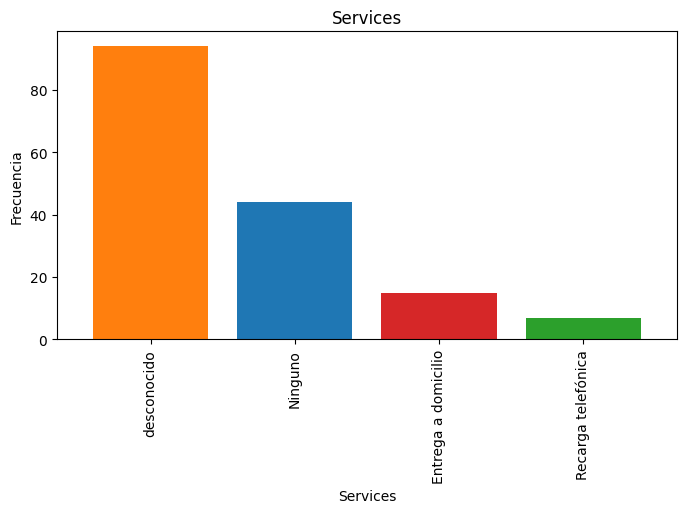

In [606]:
#Grafico de barras
bar_colors = ['tab:orange', 'tab:blue', 'tab:red', 'tab:green']
filtro16_index['frequency'].plot(kind= 'bar', width=0.8, figsize=(8,4),color=bar_colors)
plt.title("Services")
plt.xlabel("Services")
plt.ylabel("Frecuencia")

17. 69_why_not_services

In [607]:
#Análisis univariado de una sola columna
table17=freq_tbl(Datos_limpios['69_why_not_services'])
table17

,69_why_not_services,frequency,percentage,cumulative_perc
0,desconocido,130,0.760234,0.760234
1,No quiero involucrarme con la tecnología,7,0.040936,0.801170
2,No conozco los servicios,7,0.040936,0.842105
3,No creo que represente grandes ingresos,6,0.035088,0.877193
4,Es muy caro,4,0.023392,0.900585
5,"No conozco los servicios,No quiero involucrarm...",2,0.011696,0.912281
6,no es requerido,1,0.005848,0.918129
7,No sabe cómo involucrarse,1,0.005848,0.923977
8,Se quiere involucrar,1,0.005848,0.929825
9,Se vende ropa,1,0.005848,0.935673


In [608]:
filtro17 = table17[table17['frequency']>2]
filtro17

,69_why_not_services,frequency,percentage,cumulative_perc
0,desconocido,130,0.760234,0.760234
1,No quiero involucrarme con la tecnología,7,0.040936,0.801170
2,No conozco los servicios,7,0.040936,0.842105
3,No creo que represente grandes ingresos,6,0.035088,0.877193
4,Es muy caro,4,0.023392,0.900585


In [609]:
filtro17_index = filtro17.set_index('69_why_not_services')
filtro17_index

,frequency,percentage,cumulative_perc
69_why_not_services,,,
desconocido,130,0.760234,0.760234
No quiero involucrarme con la tecnología,7,0.040936,0.801170
No conozco los servicios,7,0.040936,0.842105
No creo que represente grandes ingresos,6,0.035088,0.877193
Es muy caro,4,0.023392,0.900585


Text(0.5, 1.0, '69_why_not_services')

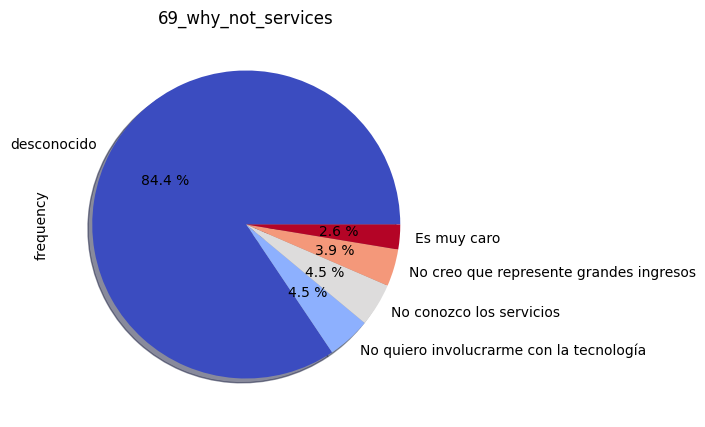

In [610]:
#Realizamos grafico de pastel del dataframe creado
filtro17_index['frequency'].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%", cmap="coolwarm")
plt.title("69_why_not_services")

18. 158_charact_organize_products_on_shelves

In [611]:
#Análisis univariado de una sola columna
table18=freq_tbl(Datos_limpios['158_charact_organize_products_on_shelves'])
table18

,158_charact_organize_products_on_shelves,frequency,percentage,cumulative_perc
0,desconocido,79,0.461988,0.461988
1,"Categoría (e.g. limpieza, aseo personal, comes...",29,0.169591,0.631579
2,Frecuencia de venta,15,0.087719,0.719298
3,Tamaño,9,0.052632,0.771930
4,Margen de utilidad,8,0.046784,0.818713
5,Precio,6,0.035088,0.853801
6,Refrigeración,4,0.023392,0.877193
7,"Frecuencia de venta,Refrigeración",3,0.017544,0.894737
8,"Categoría (e.g. limpieza, aseo personal, comes...",3,0.017544,0.912281
9,"Categoría (e.g. limpieza, aseo personal, comes...",2,0.011696,0.923977


In [612]:
filtro18 = table18[table18['frequency']>5]
filtro18

,158_charact_organize_products_on_shelves,frequency,percentage,cumulative_perc
0,desconocido,79,0.461988,0.461988
1,"Categoría (e.g. limpieza, aseo personal, comes...",29,0.169591,0.631579
2,Frecuencia de venta,15,0.087719,0.719298
3,Tamaño,9,0.052632,0.771930
4,Margen de utilidad,8,0.046784,0.818713
5,Precio,6,0.035088,0.853801


In [613]:
filtro18_index = filtro18.set_index('158_charact_organize_products_on_shelves')
filtro18_index

,frequency,percentage,cumulative_perc
158_charact_organize_products_on_shelves,,,
desconocido,79,0.461988,0.461988
"Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)",29,0.169591,0.631579
Frecuencia de venta,15,0.087719,0.719298
Tamaño,9,0.052632,0.771930
Margen de utilidad,8,0.046784,0.818713
Precio,6,0.035088,0.853801


Text(0, 0.5, 'Frecuencia')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


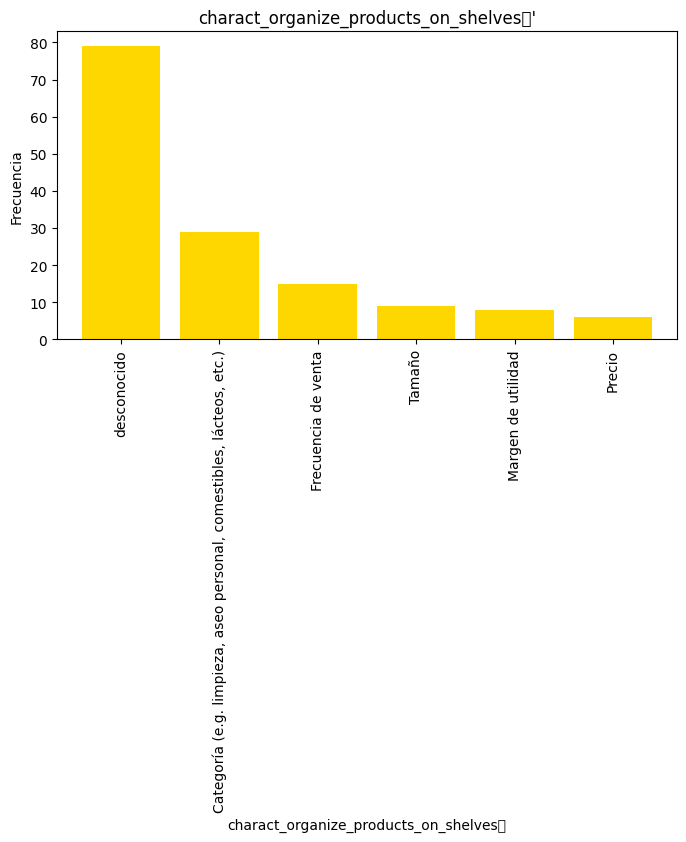

In [614]:
#Realizamos gráfico de barras
filtro18_index['frequency'].plot(kind= 'bar', width=0.8, figsize=(8,4),color="gold")
plt.title("charact_organize_products_on_shelves	'")
plt.xlabel("charact_organize_products_on_shelves	")
plt.ylabel("Frecuencia")

19. 157_frequency_organize_shelves

In [615]:
#Análisis univariado de una sola columna
table19=freq_tbl(Datos_limpios['157_frequency_organize_shelves'])
table19

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,desconocido,75,0.438596,0.438596
1,Semanalmente,40,0.233918,0.672515
2,Diariamente,32,0.187135,0.859649
3,Nunca,8,0.046784,0.906433
4,Mensualmente,7,0.040936,0.947368
5,Quincenalmente,5,0.029240,0.976608
6,Anualmente,2,0.011696,0.988304
7,Semestralmente,1,0.005848,0.994152
8,No se tiene,1,0.005848,1.000000


In [616]:
filtro19_index = table19.set_index('157_frequency_organize_shelves')
filtro19_index

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
desconocido,75,0.438596,0.438596
Semanalmente,40,0.233918,0.672515
Diariamente,32,0.187135,0.859649
Nunca,8,0.046784,0.906433
Mensualmente,7,0.040936,0.947368
Quincenalmente,5,0.029240,0.976608
Anualmente,2,0.011696,0.988304
Semestralmente,1,0.005848,0.994152
No se tiene,1,0.005848,1.000000


Text(0, 0.5, 'Frecuencia')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


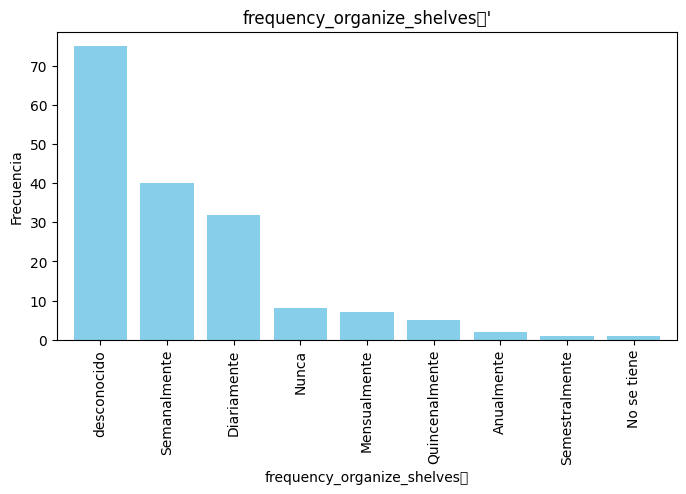

In [617]:
#Realizamos gráfico de barras
filtro19_index['frequency'].plot(kind= 'bar', width=0.8, figsize=(8,4), color="skyblue")
plt.title("frequency_organize_shelves	'")
plt.xlabel("frequency_organize_shelves	")
plt.ylabel("Frecuencia")

20. 161_actions_stockouts

In [618]:
#Análisis univariado de una sola columna
table20=freq_tbl(Datos_limpios['161_actions_stockouts'])
table20

,161_actions_stockouts,frequency,percentage,cumulative_perc
0,desconocido,79,0.461988,0.461988
1,Solicitar tiempo al cliente para conseguir el ...,31,0.181287,0.643275
2,Ofrecer un producto sustituto,20,0.116959,0.760234
3,"Ofrecer un producto sustituto,Solicitar tiempo...",12,0.070175,0.830409
4,Perder la venta,8,0.046784,0.877193
5,"Informar al proveedor,Solicitar tiempo al clie...",5,0.029240,0.906433
6,Informar al proveedor,5,0.029240,0.935673
7,"Informar al proveedor,Ofrecer un producto sust...",3,0.017544,0.953216
8,"Informar al proveedor,Ofrecer un producto sust...",2,0.011696,0.964912
9,"Informar al proveedor,Perder la venta",2,0.011696,0.976608


In [619]:
filtro20 = table20[table20['frequency']>5]
filtro20

,161_actions_stockouts,frequency,percentage,cumulative_perc
0,desconocido,79,0.461988,0.461988
1,Solicitar tiempo al cliente para conseguir el ...,31,0.181287,0.643275
2,Ofrecer un producto sustituto,20,0.116959,0.760234
3,"Ofrecer un producto sustituto,Solicitar tiempo...",12,0.070175,0.830409
4,Perder la venta,8,0.046784,0.877193


In [620]:
filtro20_index = filtro20.set_index('161_actions_stockouts')
filtro20_index

,frequency,percentage,cumulative_perc
161_actions_stockouts,,,
desconocido,79,0.461988,0.461988
Solicitar tiempo al cliente para conseguir el producto,31,0.181287,0.643275
Ofrecer un producto sustituto,20,0.116959,0.760234
"Ofrecer un producto sustituto,Solicitar tiempo al cliente para conseguir el producto",12,0.070175,0.830409
Perder la venta,8,0.046784,0.877193
